
Chargement des bibliothèques 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Chargement du fichier csv

In [453]:
df = pd.read_csv("data/G79 MDSC.csv", delimiter=";") #les colonnes sont délimités par des ;
df = df.iloc[:, 4:-1]
df = df.sample(n=20000, random_state=42)

Aperçu des données

In [454]:
print(df.head())
print(df.info()) #vérifier les types des données et les valeurs manquantes
print(df.describe()) #stats des var numériques

       CD11b FITC     LIN PE CD33 PCP55  CD14 PC7   CD34 APC CD15 EF450  \
210842   50796,84  -290,7572   20348,73   5266,17   -889,428   7905,019   
92383    29505,98   524,1801   5475,564  30675,87  -1183,261   164,2131   
113497   41392,07   648,7921   10515,79  14787,41  -1180,571   2108,324   
319301    39317,5   482,3918    12261,9  24108,38  -1251,273   450,4685   
66301    6486,169   33352,05   5357,837  4138,013   -259,269   346,6983   

       HLA DR V510  
210842     612,845  
92383     116,6549  
113497    777,9727  
319301    542,7325  
66301     232,5451  
<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 210842 to 325600
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CD11b FITC   20000 non-null  object
 1   LIN PE       20000 non-null  object
 2   CD33 PCP55   20000 non-null  object
 3   CD14 PC7     20000 non-null  object
 4   CD34 APC     20000 non-null  object
 5   CD15 EF450   20000 non

Vérifier les valeurs manquantes

In [455]:
print(df.isnull().sum())

CD11b FITC     0
LIN PE         0
CD33 PCP55     0
CD14 PC7       0
CD34 APC       0
CD15 EF450     0
HLA DR V510    0
dtype: int64


3. Afficher les valeurs de marqueurs.

Le code suivant permet d'afficher les valeurs d'expression pour chaque marqueur, rangées par les moyennes.

/var/folders/ry/yqwb4m311v78_wyjtn9yym7m0000gn/T/ipykernel_95741/2697460189.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: np.arcsinh(x ))


<Axes: ylabel='Expression'>

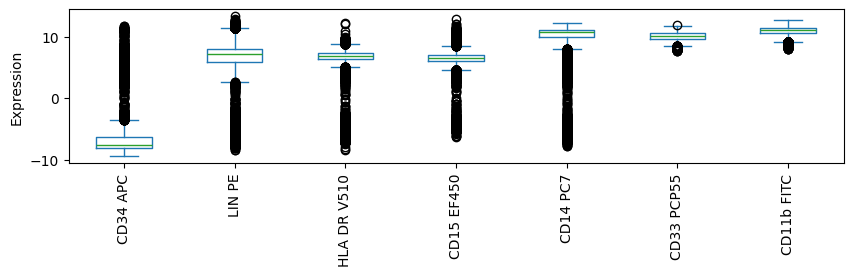

In [456]:
df = df.replace(',', '.', regex=True).apply(pd.to_numeric, errors='coerce') #pandas ne comprend pas les virgules
df = df.applymap(lambda x: np.arcsinh(x ))
sort_by_mean = df.mean().sort_values(ascending=True)
df[sort_by_mean.index].plot(kind='box', figsize=(10, 2), rot=90, ylabel='Expression')

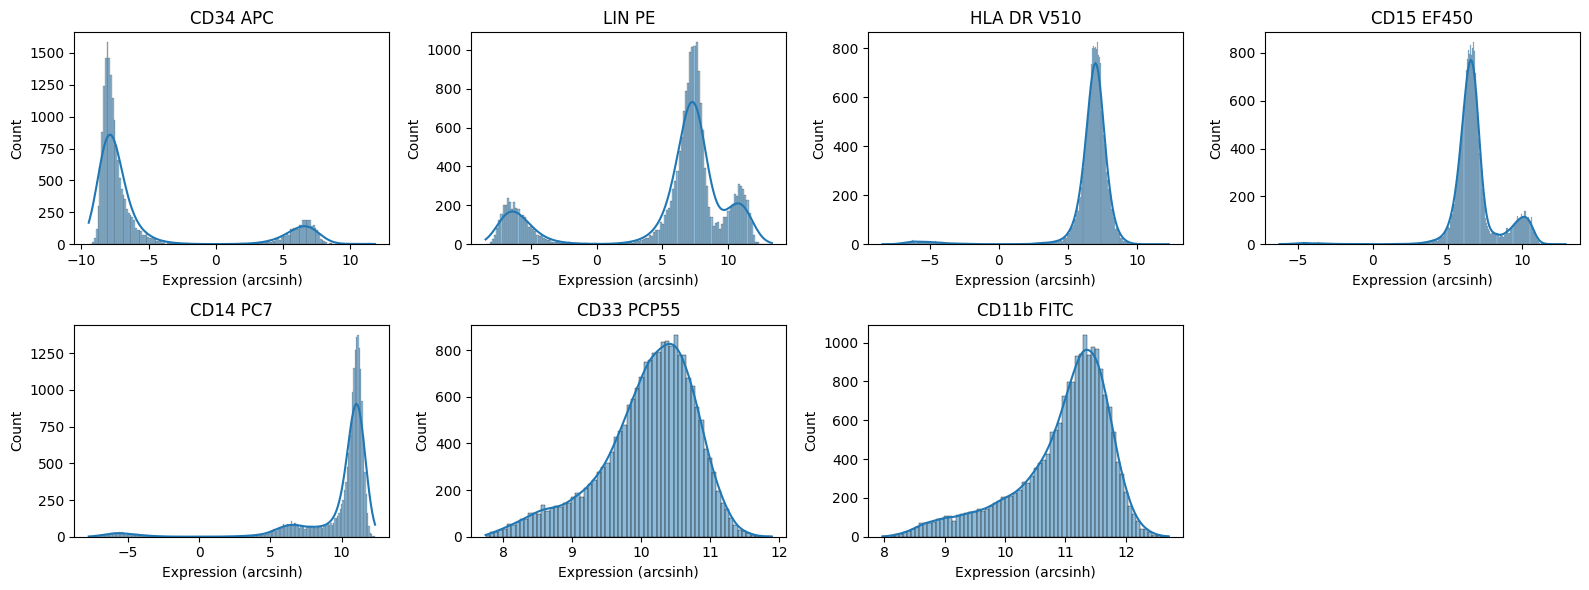

In [457]:
# Si vous avez beaucoup de colonnes, vous pouvez créer une figure avec plusieurs sous-graphiques
# Récupérer le nombre de colonnes dans votre dataframe
n_cols = len(df.columns)

# Déterminer le nombre de lignes et de colonnes pour la grille de sous-graphiques
n_rows = (n_cols + 3) // 4  # 4 graphiques par ligne
fig, axes = plt.subplots(n_rows, 4, figsize=(16, 3*n_rows))
axes = axes.flatten()  # Aplatir le tableau d'axes pour faciliter l'itération

# Tracer un histogramme pour chaque colonne
for i, column in enumerate(sort_by_mean.index):
    if i < len(axes):
        sns.histplot(df[column].dropna(), kde=True, ax=axes[i])
        axes[i].set_title(column)
        axes[i].set_xlabel('Expression (arcsinh)')
        
# Masquer les axes supplémentaires si nécessaire
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [458]:
sk=df.skew()
print('wine_data.skew()=== \n',sk)

wine_data.skew()=== 
 CD11b FITC    -1.094710
LIN PE        -1.450120
CD33 PCP55    -0.794149
CD14 PC7      -3.369397
CD34 APC       1.700142
CD15 EF450    -1.456649
HLA DR V510   -4.821411
dtype: float64


 4. Appliquer une normalisation centrée-réduite aux données

La normalisation (standardisation) centrée-réduite consiste à soustraire la moyenne et à diviser par l'écart-type les valeurs d'expression. On peut la réaliser avec l’objet StandardScaler de la librairie scikit-learn.

In [459]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = MinMaxScaler()  # Instanciation de l'objet scaler
df_scaled = scaler.fit_transform(df)  # Normalisation centrée-réduite
df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)  # Conversion en DataFrame pandas

Les valeurs d'expression sont ramenées à la même échelle après une normalisation centrée-réduite. La moyenne d’expression de chaque gène est égale à 0 et l'écart type est égal à 1.

<Axes: ylabel='Expression'>

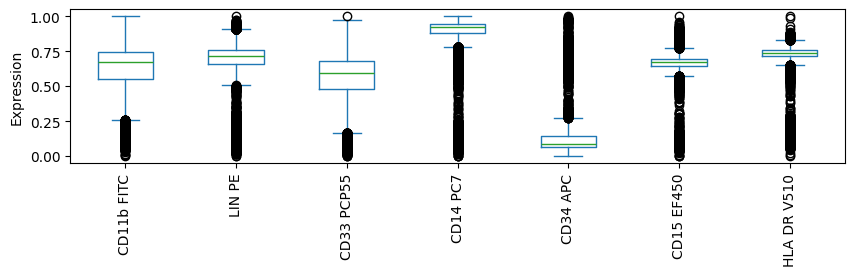

In [460]:
df_scaled.plot(kind='box', figsize=(10, 2), rot=90, ylabel='Expression')

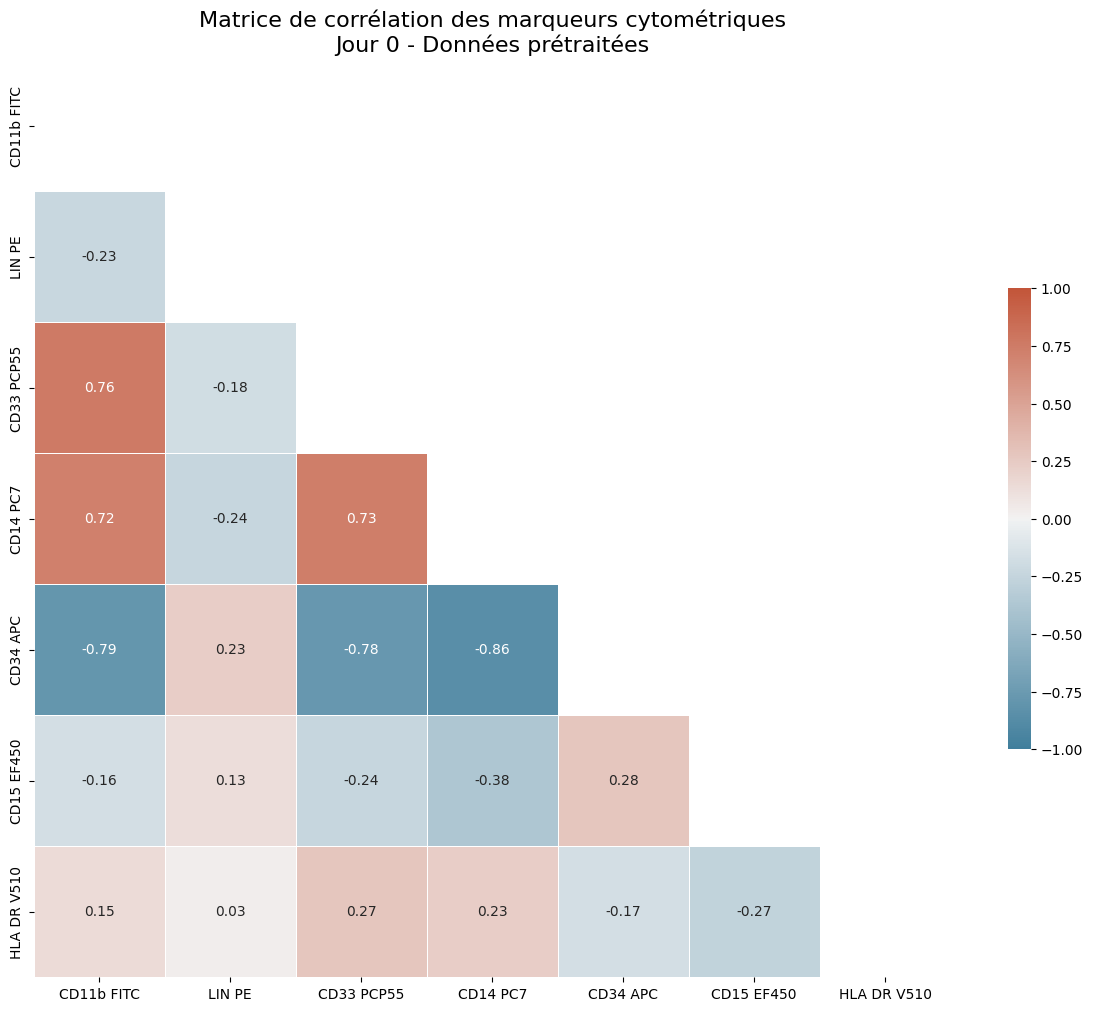


Top 10 des paires de marqueurs les plus fortement corrélés :
      Marqueur1    Marqueur2  Correlation
25     CD14 PC7     CD34 APC    -0.856407
4    CD11b FITC     CD34 APC    -0.789581
30     CD34 APC   CD33 PCP55    -0.780150
2    CD11b FITC   CD33 PCP55     0.764590
17   CD33 PCP55     CD14 PC7     0.734555
3    CD11b FITC     CD14 PC7     0.720724
38   CD15 EF450     CD14 PC7    -0.379527
33     CD34 APC   CD15 EF450     0.277771
44  HLA DR V510   CD33 PCP55     0.274352
41   CD15 EF450  HLA DR V510    -0.269407


"\ncorrelation_over_time = {\n    0: correlation_matrix_day0.loc['CD34', 'CD38'],\n    30: correlation_matrix_day30.loc['CD34', 'CD38'],\n    60: correlation_matrix_day60.loc['CD34', 'CD38'],\n    90: correlation_matrix_day90.loc['CD34', 'CD38']\n}\n\nplt.figure(figsize=(8, 6))\nplt.plot(correlation_over_time.keys(), correlation_over_time.values(), 'o-', linewidth=2)\nplt.xlabel('Jours')\nplt.ylabel('Corrélation CD34-CD38')\nplt.title('Évolution de la corrélation CD34-CD38 au cours du temps')\nplt.grid(True, alpha=0.3)\nplt.tight_layout()\nplt.savefig('correlation_evolution_CD34_CD38.png', dpi=300)\nplt.show()\n"

In [461]:
# 1. Calculer la matrice de corrélation
# Note: utilisez Spearman si la distribution n'est pas normale ou pour capturer des relations non-linéaires
correlation_matrix = df_scaled.corr(method='spearman')  # ou 'spearman'
# 2. Visualiser la matrice de corrélation
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Masque pour afficher seulement la moitié inférieure

# Définir une palette de couleurs centrée sur 0
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Créer la heatmap
sns.heatmap(correlation_matrix, 
            mask=mask,
            cmap=cmap, 
            vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, 
            annot=True,  # Afficher les valeurs (enlevez pour plus de lisibilité si beaucoup de marqueurs)
            fmt=".2f",   # Format à 2 décimales
            cbar_kws={"shrink": .5})

plt.title('Matrice de corrélation des marqueurs cytométriques\nJour 0 - Données prétraitées', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_matrix_day0.png', dpi=300)
plt.show()

# 3. Identifier les paires de marqueurs les plus fortement corrélés
# Convertir la matrice en format "long" pour faciliter le tri
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Marqueur1', 'Marqueur2', 'Correlation']

# Filtrer pour enlever les auto-corrélations et les doublons
correlation_pairs = correlation_pairs[correlation_pairs['Marqueur1'] != correlation_pairs['Marqueur2']]
correlation_pairs = correlation_pairs[~correlation_pairs['Correlation'].isna()]

# Trier par valeur absolue de corrélation décroissante
correlation_pairs['AbsCorrelation'] = correlation_pairs['Correlation'].abs()
top_correlations = correlation_pairs.sort_values('AbsCorrelation', ascending=False).drop_duplicates(subset=['AbsCorrelation'])

# Afficher les 10 paires de marqueurs les plus corrélés
print("\nTop 10 des paires de marqueurs les plus fortement corrélés :")
print(top_correlations.head(10)[['Marqueur1', 'Marqueur2', 'Correlation']])

# 4. Pour comparer les corrélations entre différents points temporels:
# Répétez ce processus pour chaque fichier temporel, puis:

# Pour visualiser les changements dans une paire spécifique de marqueurs:
"""
correlation_over_time = {
    0: correlation_matrix_day0.loc['CD34', 'CD38'],
    30: correlation_matrix_day30.loc['CD34', 'CD38'],
    60: correlation_matrix_day60.loc['CD34', 'CD38'],
    90: correlation_matrix_day90.loc['CD34', 'CD38']
}

plt.figure(figsize=(8, 6))
plt.plot(correlation_over_time.keys(), correlation_over_time.values(), 'o-', linewidth=2)
plt.xlabel('Jours')
plt.ylabel('Corrélation CD34-CD38')
plt.title('Évolution de la corrélation CD34-CD38 au cours du temps')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('correlation_evolution_CD34_CD38.png', dpi=300)
plt.show()
"""

In [462]:
import numpy as np

# Calcul des quartiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1  # Intervalle interquartile

# Détection des outliers (en dehors de [Q1 - 1.5*IQR, Q3 + 1.5*IQR])
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Extraire les lignes contenant des outliers
outlier_rows = df[outliers.any(axis=1)]
np.shape(outlier_rows)
outlier_rows  # Afficher les lignes avec des outliers

,CD11b FITC,LIN PE,CD33 PCP55,CD14 PC7,CD34 APC,CD15 EF450,HLA DR V510
210842,11.528737,-6.365639,10.613921,9.262206,-7.483726,9.668400,7.111260
176069,10.677837,8.491611,10.037585,8.839563,-7.005283,9.809972,7.811100
266801,10.358862,8.327994,9.599618,6.672299,-5.225711,10.489337,6.552666
131665,10.348180,11.716734,8.930928,6.503206,6.711526,9.730186,5.243529
128722,10.655671,9.965628,9.945119,7.824640,-6.521122,10.277278,6.680956
...,...,...,...,...,...,...,...
302840,10.096896,11.810237,9.905860,9.633795,-7.007235,6.630803,6.549437
45758,11.671459,5.608436,11.008550,11.321965,-8.285682,6.471675,-2.401628
352251,11.393044,-7.095436,10.475776,11.319470,-7.984369,5.541833,6.332223
276131,12.008249,-6.776292,11.036503,11.705520,-8.845238,6.783983,7.227768


5. Faire une analyse en composantes principales (ACP)

Le calcul de l'ACP peut se faire à l'aide de l'objet PCA de scikit-learn.

In [463]:
from sklearn.decomposition import PCA

5.1 Calcul de l'ACP

Pour calculer une ACP, on utilise les données standardisées X_scaled.

In [464]:
pca = PCA() # instanciation de l'objet pca
df_pca = pca.fit_transform(df_scaled) # réalisation de l'ACP sur les données df_scaled

/Users/macbookair/Library/Python/3.11/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/macbookair/Library/Python/3.11/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/macbookair/Library/Python/3.11/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


Il est plus pratique de convertir le résultat de l'ACP X_pca en dataframe pandas, en précisant les noms de colonnes : de PC1 à PC50.

In [465]:
# Conversion en dataframe pandas
pca_columns = ['PC' + str(c) for c in range(1, df_pca.shape[1]+1, 1)] # création d'une liste avec les noms de colonnes de PC1 à PC13
df_pca = pd.DataFrame(df_pca, index=df.index, columns=pca_columns) # création du dataframe
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
210842,-0.324312,-0.463147,-0.061906,-0.131140,-0.002675,0.034401,0.136311
92383,-0.012783,0.082749,-0.112494,0.166414,-0.079549,0.075714,-0.082483
113497,-0.078273,0.111690,-0.061622,0.010198,-0.024811,0.095281,0.065610
319301,-0.110548,0.107157,-0.028768,0.027908,-0.009532,0.043665,0.004592
66301,0.268965,0.199034,-0.175687,0.227023,0.046300,-0.098051,0.014761


5.2 Calcul de la variance expliquée

Les valeurs de la variance expliquée par composante sont disponibles dans l’attribut pca.explained_variance_ratio_ après le calcul de l'ACP.

In [466]:
pca.explained_variance_ratio_

array([0.52867733, 0.24364349, 0.07136984, 0.05920585, 0.04437759,
       0.02965743, 0.02306847])

On peut les convertir en objet Series de pandas et présenter les valeurs en pourcentage.

In [467]:
explained_variance = pd.Series(dict(zip(df_pca.columns, 100.0*pca.explained_variance_ratio_)))
print(explained_variance.head())

PC1    52.867733
PC2    24.364349
PC3     7.136984
PC4     5.920585
PC5     4.437759
dtype: float64


<Axes: ylabel='Explained variance'>

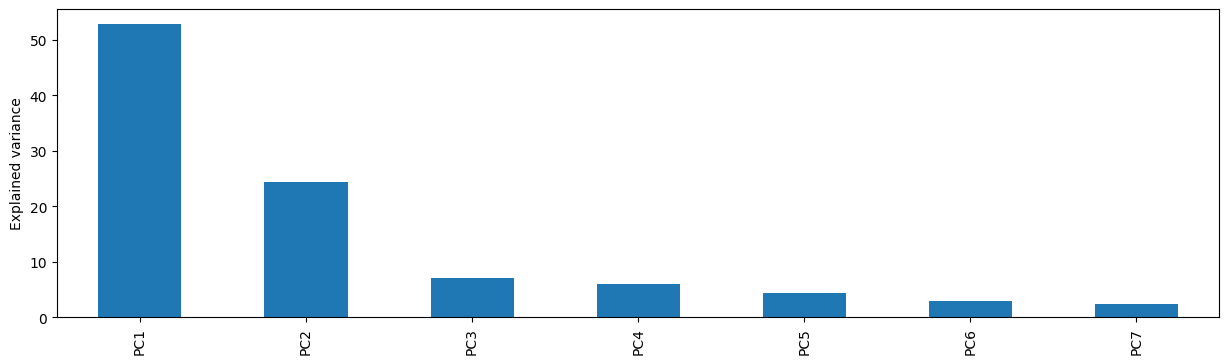

In [468]:
explained_variance.plot(kind='bar', figsize=(15, 4), rot=90, ylabel='Explained variance')

In [469]:
explained_variance['PC1'] + explained_variance['PC2']

np.float64(77.23208176045017)

Les deux premières composantes de l'ACP expliquent 77% de la variance.

In [470]:
explained_variance['PC1'] + explained_variance['PC2'] + explained_variance['PC3']

np.float64(84.36906533702545)

Les trois premières composantes de l'ACP expliquent 89.6% de la variance.

5.3 Visualisation des deux premières composantes principales de l’ACP

<Axes: xlabel='PC1', ylabel='PC2'>

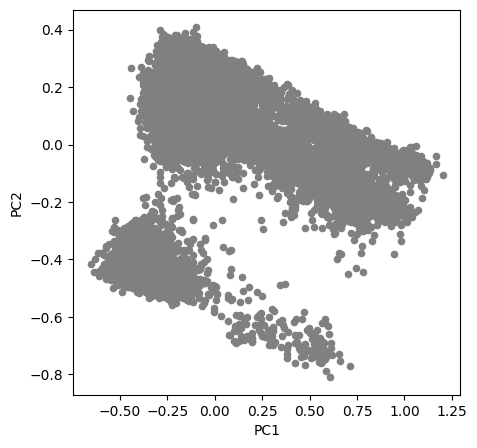

In [471]:
df_pca.plot(x='PC1', y='PC2', kind='scatter', figsize=(5, 5), color='gray')

5.4 Visualisation des trois premières composantes principales de l’ACP

Pour créer une image en 3D, on utilisera la librairie standard matplotlib de Python.

In [472]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

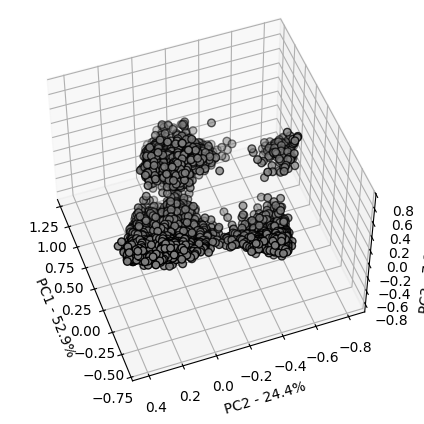

In [473]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], marker='o', s=30, edgecolor='k', color='gray')
ax.set_xlabel('PC1 - ' + '{:.1f}%'.format(explained_variance['PC1']))
ax.set_ylabel('PC2 - ' + '{:.1f}%'.format(explained_variance['PC2']))
ax.set_zlabel('PC3 - ' + '{:.1f}%'.format(explained_variance['PC3']))
ax.view_init(elev=50, azim=160)

6. Visualiser les données avec la méthode t-SNE

La méthode t-SNE (t-distributed stochastic neighbor embedding) fait partie de la librairie scikit-learn.




In [474]:
from sklearn.manifold import TSNE

6.1 Projection 2D

In [ ]:
tsne = TSNE(n_components=2, init='pca', random_state=0, n_jobs=-1)
df_tsne = tsne.fit_transform(df_scaled)

/Users/macbookair/Library/Python/3.11/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/macbookair/Library/Python/3.11/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/macbookair/Library/Python/3.11/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/macbookair/Library/Python/3.11/lib/python/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/macbookair/Library/Python/3.11/lib/python/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/macbookair/Library/Python/3.11/lib/python/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: invalid value encountered in matmul

In [ ]:
columns = ['DIM' + str(c) for c in range(1, df_tsne.shape[1]+1, 1)]
df_tsne = pd.DataFrame(df_tsne, index=df.index, columns=columns)
df_tsne.head()

,DIM1,DIM2
262687,-34.396057,69.994804
220559,12.703474,20.654144
198537,-18.556971,-99.276031
161389,-17.429047,-11.745323
214246,-25.682692,11.512521


<Axes: xlabel='DIM1', ylabel='DIM2'>

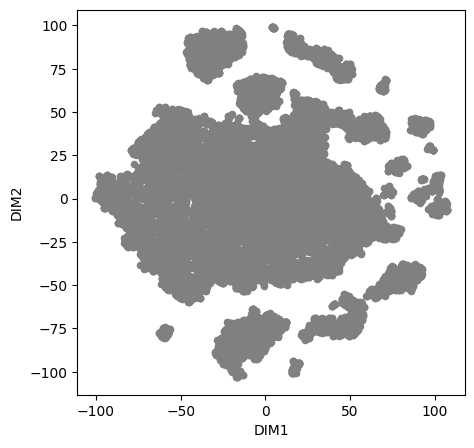

In [ ]:
df_tsne.plot(x='DIM1', y='DIM2', kind='scatter', figsize=(5, 5), color='gray')

In [ ]:
# La divergence de Kullback-Leibler après optimisation
tsne.kl_divergence_

1.9166417121887207

6.2 Projection 3D


In [ ]:
tsne = TSNE(n_components=3, init='pca', perplexity=45, random_state=0, n_jobs=-1)
df_tsne = tsne.fit_transform(df_scaled)

/Users/macbookair/Library/Python/3.11/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/macbookair/Library/Python/3.11/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/macbookair/Library/Python/3.11/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/macbookair/Library/Python/3.11/lib/python/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/macbookair/Library/Python/3.11/lib/python/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/macbookair/Library/Python/3.11/lib/python/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: invalid value encountered in matmul

KeyboardInterrupt: 

In [ ]:
columns = ['DIM' + str(c) for c in range(1, df_tsne.shape[1]+1, 1)]
df_tsne = pd.DataFrame(df_tsne, index=df.index, columns=columns)
df_tsne.head()

,DIM1,DIM2,DIM3
198566,8.804728,-4.138847,0.871769
473005,-1.479812,-2.280914,-2.430552
382318,-17.875343,6.140421,-1.470343
144028,-0.766997,4.653109,10.112005
458979,-1.505644,9.642259,-4.970150


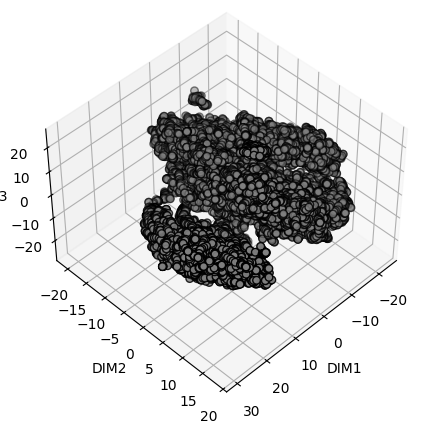

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_tsne['DIM1'], df_tsne['DIM2'], df_tsne['DIM3'], marker='o', s=30, edgecolor='k', facecolor='grey')
ax.set_xlabel('DIM1')
ax.set_ylabel('DIM2')
ax.set_zlabel('DIM3')
ax.view_init(elev=45, azim=45)

In [ ]:
tsne.kl_divergence_

1.8163902759552002

7. Visualiser les données avec la méthode UMAP

Actuellement, la méthode UMAP (Uniform Manifold Approximation and Projection) n’est pas intégrée dans scikit-learn. Pour l’utiliser il est nécessaire d’installer la librairie umap-learn (voir doc https://umap-learn.readthedocs.io). La commande d’installation avec python3 -m pip install umap-learn.

In [ ]:
import umap

7.1 Projection 2D

In [ ]:
embedding = umap.UMAP(n_components=2, random_state=0, n_jobs=-1)
df_umap = embedding.fit_transform(df_scaled)
columns = ['DIM' + str(c) for c in range(1, df_umap.shape[1]+1, 1)]
df_umap = pd.DataFrame(df_umap, index=df.index, columns=columns)

/Users/macbookair/Library/Python/3.11/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/macbookair/Library/Python/3.11/lib/python/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


<Axes: xlabel='DIM1', ylabel='DIM2'>

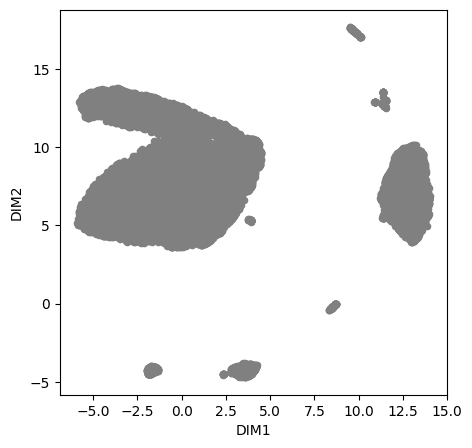

In [ ]:
df_umap.plot(x='DIM1', y='DIM2', kind='scatter', figsize=(5, 5), color='gray')

7.2 Projection 3D

In [ ]:
embedding = umap.UMAP(n_components=3, random_state=0, n_jobs=-1)
df_umap = embedding.fit_transform(df_scaled)
columns = ['DIM' + str(c) for c in range(1, df_umap.shape[1]+1, 1)]
df_umap = pd.DataFrame(df_umap, index=df.index, columns=columns)

/Users/macbookair/Library/Python/3.11/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/macbookair/Library/Python/3.11/lib/python/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


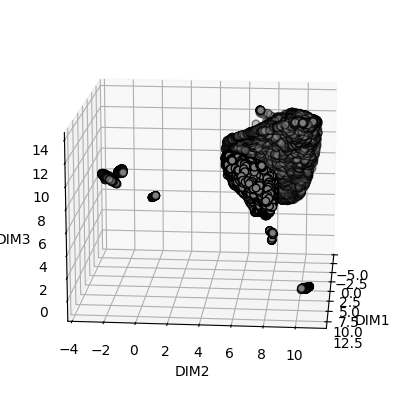

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_umap['DIM1'], df_umap['DIM2'], df_umap['DIM3'], marker='o', s=30, edgecolor='k', facecolor='gray')
ax.set_xlabel('DIM1')
ax.set_ylabel('DIM2')
ax.set_zlabel('DIM3')
ax.view_init(elev=15, azim=5)

regarder des methodes pour des distributions qui evoluent dans le temps, sous echantillonage